<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/beginner/workshop7/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop7/data/clustering1.csv")
df.head()

,x,y
0,-5.198113,0.641869
1,-5.752295,0.418627
2,-10.844898,-7.553523
3,-4.570985,-0.801017
4,-3.519162,0.039345


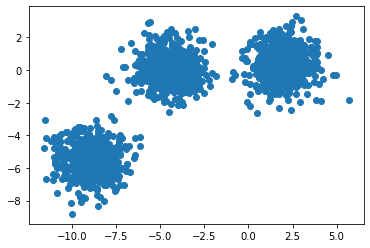

In [ ]:
plt.scatter(df.x, df.y)     # ask audience how many clusters there are (3)

## KMeans

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
y_pred = kmeans.predict(df)
y_pred

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_pred = kmeans.fit_predict(df)     # fits ans predicts on the same data, useful because no train test split
y_pred

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Clustering with KMeans')

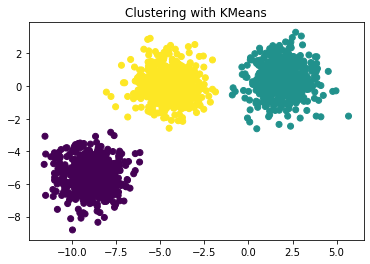

In [ ]:
plt.scatter(df.x, df.y, c=y_pred)
plt.title("Clustering with KMeans")

##Mean Shift

In [ ]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=2)

In [ ]:
y_pred = meanshift.fit_predict(df)
y_pred

array([0, 0, 2, ..., 1, 1, 1])

Text(0.5, 1.0, 'Clustering with Mean Shift')

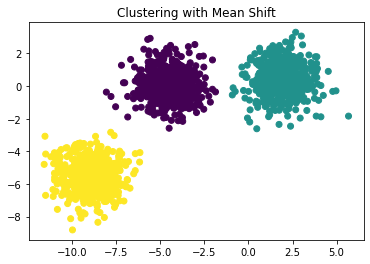

In [ ]:
plt.scatter(df.x, df.y, c=y_pred)
plt.title("Clustering with Mean Shift")   # change bandwidth to 1 and then 5

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=10)

In [ ]:
y_pred = dbscan.fit_predict(df)

Text(0.5, 1.0, 'Clustering with DBSCAN')

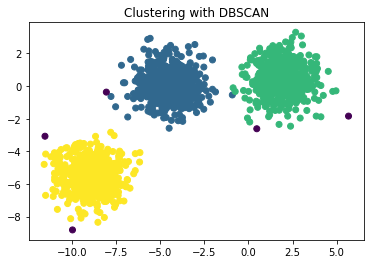

In [ ]:
plt.scatter(df.x, df.y, c=y_pred)
plt.title("Clustering with DBSCAN")   # change eps to 0.5 then to 1.2, change min_samples to 5 then to 50

## Irreguar Clusters (Clustering Comparison)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop7/data/clustering2.csv")
df.head()

,x,y
0,1.788485,-0.401530
1,0.210782,-0.062488
2,-0.133097,-0.587892
3,-1.572178,-0.229703
4,0.427784,0.325901


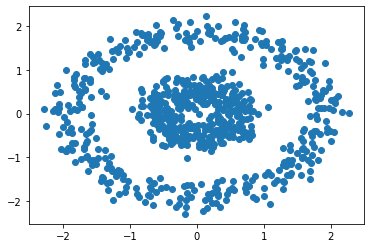

In [ ]:
plt.scatter(df.x, df.y)     # ask audience how many clusters there are (3)

Text(0.5, 1.0, 'Clustering with KMeans')

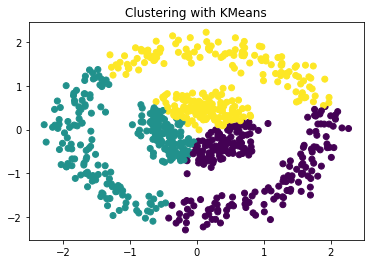

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(df)
plt.scatter(df.x, df.y, c=y_pred)
plt.title("Clustering with KMeans")     # seems to divide dataset into 3

Text(0.5, 1.0, 'Clustering with Mean Shift')

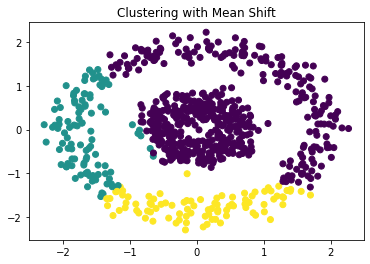

In [ ]:
meanshift = MeanShift(bandwidth=1)
y_pred = meanshift.fit_predict(df)
plt.scatter(df.x, df.y, c=y_pred)
plt.title("Clustering with Mean Shift")     # seems to find a lot of density around the center, trouble with outside ring

Text(0.5, 1.0, 'Clustering with DBSCAN')

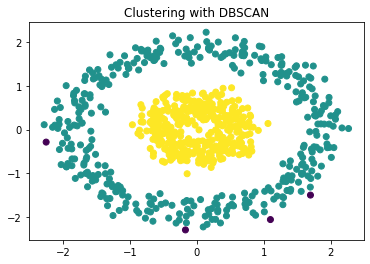

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_pred = dbscan.fit_predict(df)
plt.scatter(df.x, df.y, c=y_pred)
plt.title("Clustering with DBSCAN")     # works very well!

#Asociation

## Apriori Algorithm

In [ ]:
!pip install apyori
from apyori import apriori

In [ ]:

df = [['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'], ['Wine','' , 'Bread', 'Butter', 'Milk',''], ['','' , 'Bread', 'Butter', 'Milk','' ], ['', 'Chips', '','' , '', 'Apple'], ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'], ['', 'Chips','Bread' , 'Butter', 'Milk',], ['Wine','' , 'Bread','' , 'Milk', 'Apple'], ['Wine', 'Chips','Bread', 'Butter', 'Milk', 'Apple'],['Wine','' , 'Bread', 'Butter', 'Milk', ''], ['Wine', 'Chips', '', '','' , 'Apple'], ['', '','' , '', 'Milk', ''], ['','' , 'Bread', '', 'Milk', 'Apple'],['', 'Chips', 'Bread', 'Butter', 'Milk', ''], ['', '', 'Bread', '','Milk' , ''], ['Wine', 'Chips', 'Bread', '', 'Milk','' ], ['', '', 'Bread', 'Butter', 'Milk', ''],['Wine', 'Chips', 'Bread', '', 'Milk', ''], ['Wine', 'Chips', 'Bread', '', 'Milk', 'Apple'], ['', '', 'Bread', 'Butter', 'Milk', ''], ['', '', 'Bread', 'Butter', 'Milk', ''] , ['Wine', 'Chips', 'Bread', '', 'Milk', ''], ['Wine', '', 'Bread', '', 'Milk', '']]
df = pd.DataFrame(df)
df.replace([''], [np.NaN], inplace=True)
df


,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,NaN,Bread,Butter,Milk,NaN
2,NaN,NaN,Bread,Butter,Milk,NaN
3,NaN,Chips,NaN,NaN,NaN,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,NaN,Chips,Bread,Butter,Milk,None
6,Wine,NaN,Bread,NaN,Milk,Apple
7,Wine,Chips,Bread,Butter,Milk,Apple
8,Wine,NaN,Bread,Butter,Milk,NaN
9,Wine,Chips,NaN,NaN,NaN,Apple


In [ ]:
records = []
for i in range(22):
  records.append([str(df.values[i, j]) for j in range(0, 6)])
records

[['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'Chips', 'nan', 'nan', 'nan', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['nan', 'Chips', 'Bread', 'Butter', 'Milk', 'None'],
 ['Wine', 'nan', 'Bread', 'nan', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['Wine', 'Chips', 'nan', 'nan', 'nan', 'Apple'],
 ['nan', 'nan', 'nan', 'nan', 'Milk', 'nan'],
 ['nan', 'nan', 'Bread', 'nan', 'Milk', 'Apple'],
 ['nan', 'Chips', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'nan', 'Bread', 'nan', 'Milk', 'nan'],
 ['Wine', 'Chips', 'Bread', 'nan', 'Milk', 'nan'],
 ['nan', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['Wine', 'Chips', 'Bread', 'nan', 'Milk', 'nan'],
 ['Wine', 'Chips', 'Bread', 'nan', 'Milk', 'Apple'],
 ['nan', 'nan', 'Bread', 'Butter', 'Milk', 'nan'],
 ['nan', 'nan', 'Br

In [ ]:
association_rules = apriori(records, min_support=0.5, min_confidence=0.7, minlift=1.2, min_length = 2)
association_results = list(association_rules)
results = []
for x in range(len(association_results)):
        if len(association_results[x].items) > 1 and 'nan' not in association_results[x].items:
          results.append(association_results[x])
results

[RelationRecord(items=frozenset({'Bread', 'Butter'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Butter'}), items_add=frozenset({'Bread'}), confidence=1.0, lift=1.1578947368421053)]),
 RelationRecord(items=frozenset({'Bread', 'Milk'}), support=0.8636363636363636, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread', 'Milk'}), confidence=0.8636363636363636, lift=1.0), OrderedStatistic(items_base=frozenset({'Bread'}), items_add=frozenset({'Milk'}), confidence=1.0, lift=1.1), OrderedStatistic(items_base=frozenset({'Milk'}), items_add=frozenset({'Bread'}), confidence=0.9500000000000001, lift=1.1)]),
 RelationRecord(items=frozenset({'Bread', 'Wine'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Wine'}), items_add=frozenset({'Bread'}), confidence=0.9166666666666667, lift=1.0614035087719298)]),
 RelationRecord(items=frozenset({'Butter', 'Milk'}), support=0.5, ordered_statistics=[OrderedStatistic(it